## Proyecto 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos la función de condición inicial
def fun(x):
    return np.sin(np.pi*x)
#Establecemos el Método de Diferencias Finitas Progresivo
def MDFProg(Nt,Nx,lamb,w,pt):
    Temp=np.array([w])#Matriz donde guardaremos las temperaturas a ciertos tiempos
    z=np.zeros(Nx) #Arreglo auxiliar que almacenará las temperaturas
    for j in range(1,Nt+1):
        #Condiciones iniciales
        z[0]=0
        z[-1]=0
        for i in range(1,Nx-1):
            z[i]=(1.0-2.0*lamb)*w[i]+lamb*(w[i-1]+w[i+1])#Solución al tiempo t_j
        w=np.copy(z)
        #Cada cierto tiempo almacenamos la solución
        if j%pt==0:
            Temp=np.append(Temp,np.array([w]),axis=0) 
    return Temp
#Establecemos el Método de Diferencias Finitas Regresivo
def MDFReg(Nt,Nx,lamb,w0,pt):
    w=np.zeros(Nx) #Inicializamos el vector de temperaturas(En el caso del problema
                    #debe tener extremos con temperatura 0)
    it=0 #Inicializamos el contador
    itmax=10000 #Máxima iteración
    epsilon=10**(-8) #Tolerancia
    Temp=np.array([w0]) #Matriz que almacena las temperaturas a ciertos tiempos
    for j in range(1,Nt+1):#Cada vez que se itere j, se tomará la solución anterior como w(j-1)
        #Condición inicial de Gauss-Seidel
        z=np.zeros(Nx)
        #Realizamos el método de Gauss-Seidel
        while it<itmax:
            delta=0.0
            length=0.0
            for i in range(1,Nx-1):
                #Fórmula para el método de Gauss-Seidel
                w[i]=(w0[i]+lamb*(z[i+1]+w[i-1]))/(1.0+2.0*lamb) 
                delta+=(z[i]-w[i])**2
                length+=w[i]**2
            delta=np.sqrt(delta/length)
            if delta<epsilon: #Se verifica la convergencia
                #Establecemos la solución en el tiempo j-1
                w0=np.copy(w)
                #Para ciertos tiempos se guarda la solución
                if j%pt==0:
                    Temp=np.append(Temp,np.array([w]),axis=0) 
                break
            else:
                z=np.copy(w)
            it+=1
    return Temp

Probaremos para L=1 con $\alpha=1$, $h_x$=0.1 y $h_t$=0.0005

In [3]:
tmax=0.5 #Tiempo máximo de iteración
ht=0.0005 #Intervalo de tiempo
Nt=int(tmax/ht)
hx=0.1 #Intervalo de posición
xmin=0.0
xmax=1.0
L=xmax-xmin

In [4]:
#Definimos el arreglo de las posiciones
xpos=np.arange(xmin,xmax+hx,hx)
Nx=xpos.size #Tamaño del arreglo de las posiciones
#Definimos la temperatura inicial
w=fun(xpos)
alfa=1
lamb=alfa**2*ht/hx**2
pt=100

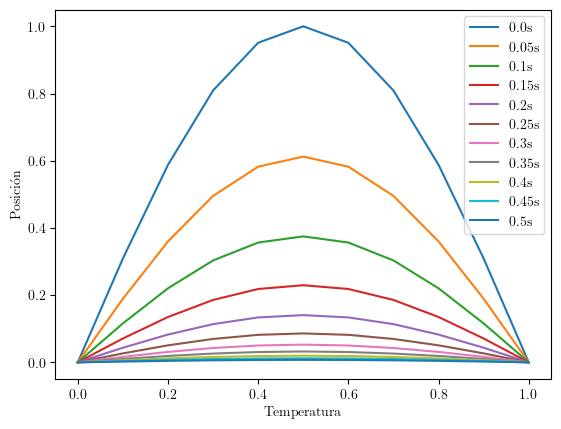

In [5]:
#----------PROGRESIVO-------#
Temppro=MDFProg(Nt,Nx,lamb,w,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Temppro.shape[0]):
    plt.plot(xpos,Temppro[i], label=str(round(i*pt*ht,2))+"s")
plt.ylabel("Posición")
plt.xlabel("Temperatura")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFPro1.pdf")

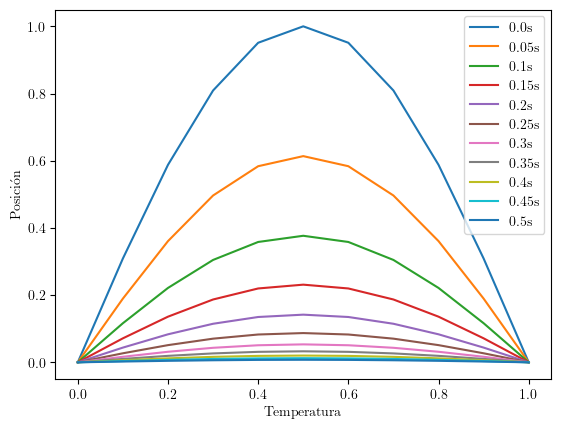

In [6]:
#----------REGRESIVO-----#
w0=fun(xpos)
Tempreg=MDFReg(Nt,Nx,lamb,w0,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Tempreg.shape[0]):
    plt.plot(xpos,Tempreg[i], label=str(round(i*pt*ht,2))+"s")
plt.ylabel("Posición")
plt.xlabel("Temperatura")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFReg1.pdf")

In [14]:
print("Temperaturas por MDF Progresivo: ", "Temperaturas por MDF Regresivo: ")
for i in range(Nx):
    print(round(Temppro[-1,i],5),"&", round(Tempreg[-1,i],5),r'\\')

Temperaturas por MDF Progresivo:  Temperaturas por MDF Regresivo: 
0.0 & 0.0 \\
0.00229 & 0.00234 \\
0.00435 & 0.00445 \\
0.00599 & 0.00613 \\
0.00704 & 0.00721 \\
0.0074 & 0.00758 \\
0.00704 & 0.00721 \\
0.00599 & 0.00613 \\
0.00435 & 0.00445 \\
0.00229 & 0.00234 \\
0.0 & 0.0 \\


Probaremos para L=1 con $\alpha=1$, $h_x$=0.1 y $h_t$=0.01

In [17]:
tmax=0.5 #Tiempo máximo de iteración
ht=0.01 #Intervalo de tiempo
Nt=int(tmax/ht)
hx=0.1 #Intervalo de posición
xmin=0.0
xmax=1.0
L=xmax-xmin

In [18]:
#Definimos el arreglo de las posiciones
xpos=np.arange(xmin,xmax+hx,hx)
Nx=xpos.size #Tamaño del arreglo de las posiciones
#Definimos la temperatura inicial
w=fun(xpos)
alfa=1
lamb=alfa**2*ht/hx**2
pt=10

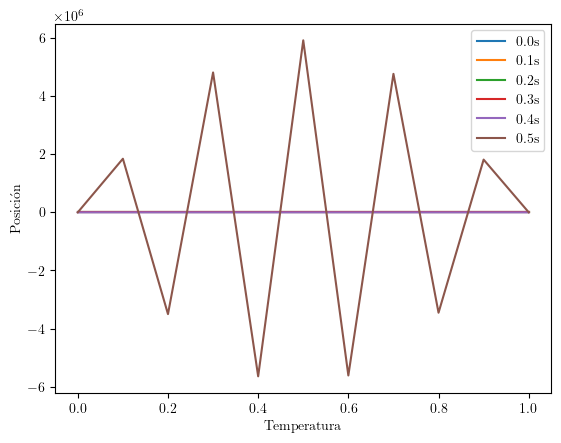

In [19]:
#----------PROGRESIVO-----#
Temppro=MDFProg(Nt,Nx,lamb,w,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Temppro.shape[0]):
    plt.plot(xpos,Temppro[i], label=str(round(i*pt*ht,2))+"s")
plt.ylabel("Posición")
plt.xlabel("Temperatura")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFPro2.pdf")

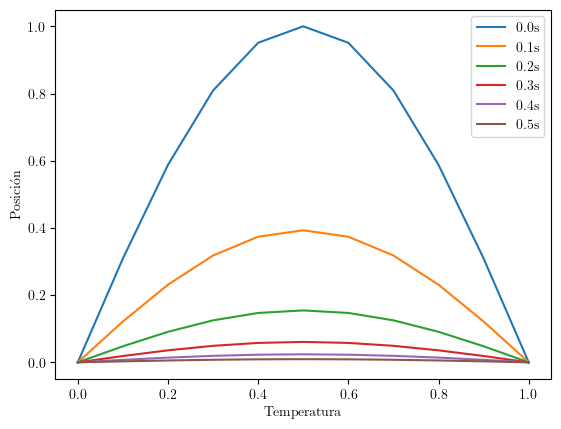

In [11]:
#----------REGRESIVO-----#
w0=fun(xpos)
Tempreg=MDFReg(Nt,Nx,lamb,w0,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Tempreg.shape[0]):
    plt.plot(xpos,Tempreg[i], label=str(round(i*pt*ht,2))+"s")
plt.ylabel("Posición")
plt.xlabel("Temperatura")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFReg2.pdf")

In [12]:
print("Temperaturas por MDF Regresivo: ", Tempreg[-1])

Temperaturas por MDF Regresivo:  [0.         0.00289802 0.00551235 0.0075871  0.00891918 0.00937818
 0.00891918 0.0075871  0.00551235 0.00289802 0.        ]
